# Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

from algorithms.epsilon_greedy import EpsilonGreedy

# Set Random Seed

In [2]:
np.random.seed(42)

# Pilot runs for epsilon-greedy tuning

In [3]:
# bandit experiment parameters
num_arms = 10
num_steps = 1000
num_runs = 300

## a. Using decreasing step size

In [4]:
# epsilons to consider
epsilons = [0.01, 0.05, 0.1, 0.2]

# performance of algorithm
average_reward = []
optimal_action = []

for epsilon in epsilons:

    average_reward_per_run = []
    optimal_action_per_run = []

    for run in range(num_runs):

        # create testbed using epsilon-greedy search
        bandit = EpsilonGreedy(num_arms= num_arms, epsilon= epsilon)

        # run experiment to obtain average reward and optimal action per step
        average_reward_per_step, optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

        average_reward_per_run.append(average_reward_per_step)
        optimal_action_per_run.append(optimal_action_per_step)

    # obtain the average of the runs
    average_reward.append(np.mean(average_reward_per_run, axis= 0))
    optimal_action.append(np.mean(optimal_action_per_run, axis=0))

## Average Rewards

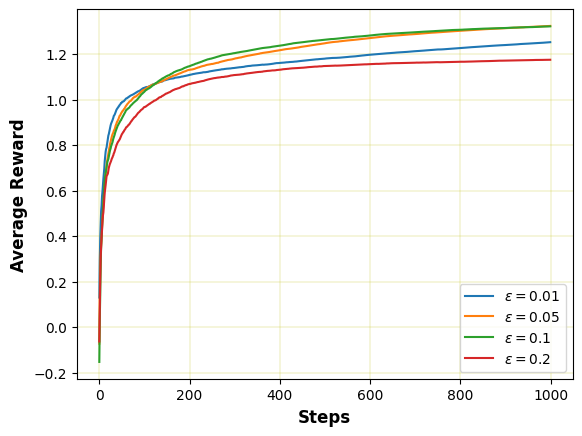

In [5]:
plt.plot(average_reward[0], label = '$\epsilon = {}$'.format(epsilons[0]))
plt.plot(average_reward[1], label = '$\epsilon = {}$'.format(epsilons[1]))
plt.plot(average_reward[2], label = '$\epsilon = {}$'.format(epsilons[2]))
plt.plot(average_reward[3], label = '$\epsilon = {}$'.format(epsilons[3]))
plt.legend()
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

## Optimal action

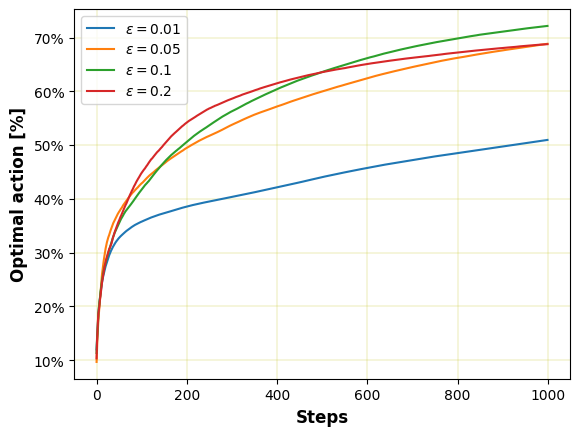

In [6]:
plt.plot(optimal_action[0], label = '$\epsilon = {}$'.format(epsilons[0]))
plt.plot(optimal_action[1], label = '$\epsilon = {}$'.format(epsilons[1]))
plt.plot(optimal_action[2], label = '$\epsilon = {}$'.format(epsilons[2]))
plt.plot(optimal_action[3], label = '$\epsilon = {}$'.format(epsilons[3]))
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Optimal action [%]', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

# b. Using fixed step size (epsilon = 0.1)

In [7]:
alphas = [0.5, 0.2, 0.1, 0.05, 0.01]

epsilon = 0.1

average_reward_for_fixed = []
optimal_action_for_fixed = []

for alpha in alphas:
    
    average_reward_per_run = []
    optimal_action_per_run = []

    for run in range(num_runs):

        # create testbed using epsilon-greedy search
        bandit = EpsilonGreedy(num_arms= num_arms, epsilon= epsilon, alpha= alpha)

        # run experiment to obtain average reward and optimal action per step
        average_reward_per_step, optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

        average_reward_per_run.append(average_reward_per_step)
        optimal_action_per_run.append(optimal_action_per_step)

    # obtain the average of the runs
    average_reward_for_fixed.append(np.mean(average_reward_per_run, axis= 0))
    optimal_action_for_fixed.append(np.mean(optimal_action_per_run, axis=0))

## Average Reward

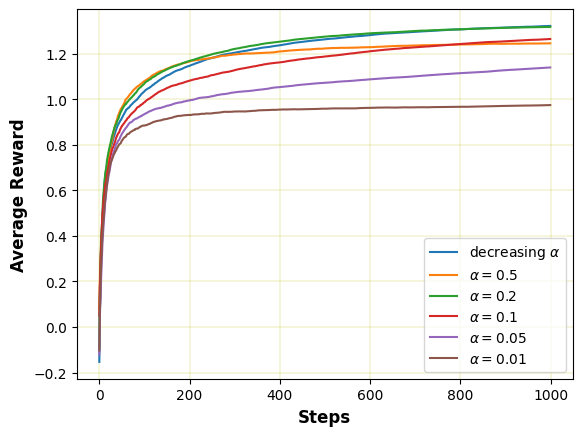

In [8]:
# the chosen epsilon for decreasing step size, epsilon = 0.1
plt.plot(average_reward[2], label = 'decreasing $\\alpha$')

# for constant step size
plt.plot(average_reward_for_fixed[0], label = '$\\alpha = {}$'.format(alphas[0]))
plt.plot(average_reward_for_fixed[1], label = '$\\alpha = {}$'.format(alphas[1]))
plt.plot(average_reward_for_fixed[2], label = '$\\alpha= {}$'.format(alphas[2]))
plt.plot(average_reward_for_fixed[3], label = '$\\alpha= {}$'.format(alphas[3]))
plt.plot(average_reward_for_fixed[4], label = '$\\alpha = {}$'.format(alphas[4]))
plt.legend()
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

## Optimal action

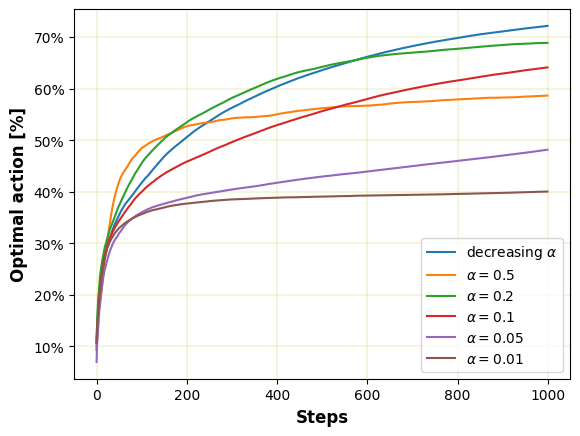

In [9]:
# for the chosen epsilon for decreasing step size
plt.plot(optimal_action[2], label = 'decreasing $\\alpha$')

# for the constant step sizes
plt.plot(optimal_action_for_fixed[0], label = '$\\alpha = {}$'.format(alphas[0]))
plt.plot(optimal_action_for_fixed[1], label = '$\\alpha = {}$'.format(alphas[1]))
plt.plot(optimal_action_for_fixed[2], label = '$\\alpha = {}$'.format(alphas[2]))
plt.plot(optimal_action_for_fixed[3], label = '$\\alpha = {}$'.format(alphas[3]))
plt.plot(optimal_action_for_fixed[4], label = '$\\alpha = {}$'.format(alphas[4]))
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Optimal action [%]', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)